# DS 301 - Project
**Jaeyeon Won**

## Get the Data

**Import Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read in Dataset**

In [2]:
data_path = os.path.join("datasets", "globalterrorismdb_0919dist.csv")
data = pd.read_csv(data_path)

C:\anaconda\envs\ds301\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Take a Quick Look at the Dataset**

In [3]:
data.shape

(191464, 135)

## Clean the Data

In [4]:
# First Feature Selection - Keep only the related variables
data = data[['iyear', 'country_txt', 'region_txt', 'multiple', 'success', 'suicide', 'attacktype1_txt',
            'targtype1_txt', 'natlty1_txt', 'gname', 'individual', 'weaptype1_txt', 'nkill', 'nwound']]

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            191464 non-null  int64  
 1   country_txt      191464 non-null  object 
 2   region_txt       191464 non-null  object 
 3   multiple         191464 non-null  int64  
 4   success          191464 non-null  int64  
 5   suicide          191464 non-null  int64  
 6   attacktype1_txt  191464 non-null  object 
 7   targtype1_txt    191464 non-null  object 
 8   natlty1_txt      189742 non-null  object 
 9   gname            191464 non-null  object 
 10  individual       191464 non-null  int64  
 11  weaptype1_txt    191464 non-null  object 
 12  nkill            180435 non-null  float64
 13  nwound           173905 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 20.5+ MB


In [5]:
# Rename the variables
data = data.rename(columns = {'iyear':'year', 'country_txt':'country','region_txt':'region',
                    'attacktype1_txt':'attackType','targtype1_txt':'targetType', 'natlty1_txt':'victNationality',
                    'gname':'perpGroup', 'nperps':'nPerp', 'weaptype1_txt':'weaponType',
                    'nkill':'nKilled','nwound':'nInjured'})

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             191464 non-null  int64  
 1   country          191464 non-null  object 
 2   region           191464 non-null  object 
 3   multiple         191464 non-null  int64  
 4   success          191464 non-null  int64  
 5   suicide          191464 non-null  int64  
 6   attackType       191464 non-null  object 
 7   targetType       191464 non-null  object 
 8   victNationality  189742 non-null  object 
 9   perpGroup        191464 non-null  object 
 10  individual       191464 non-null  int64  
 11  weaponType       191464 non-null  object 
 12  nKilled          180435 non-null  float64
 13  nInjured         173905 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 20.5+ MB


In [6]:
# See NAs
data.isnull().sum()

year                   0
country                0
region                 0
multiple               0
success                0
suicide                0
attackType             0
targetType             0
victNationality     1722
perpGroup              0
individual             0
weaponType             0
nKilled            11029
nInjured           17559
dtype: int64

In [7]:
# Drop NAs b/c they are not dramatically shortening the number of observations 
data.dropna(subset=['victNationality', 'nKilled', 'nInjured'], inplace = True)

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171626 entries, 0 to 191463
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             171626 non-null  int64  
 1   country          171626 non-null  object 
 2   region           171626 non-null  object 
 3   multiple         171626 non-null  int64  
 4   success          171626 non-null  int64  
 5   suicide          171626 non-null  int64  
 6   attackType       171626 non-null  object 
 7   targetType       171626 non-null  object 
 8   victNationality  171626 non-null  object 
 9   perpGroup        171626 non-null  object 
 10  individual       171626 non-null  int64  
 11  weaponType       171626 non-null  object 
 12  nKilled          171626 non-null  float64
 13  nInjured         171626 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 19.6+ MB


In [8]:
# Convert the data types
# Numeric
data['nKilled'] = data['nKilled'].astype('int64')
data['nInjured'] = data['nInjured'].astype('int64')

# Categorical
data['multiple'] = data['multiple'].astype('category')
data['success'] = data['success'].astype('category')
data['suicide'] = data['suicide'].astype('category')
data['individual'] = data['individual'].astype('category')

# Check
print("nKilled type: {}".format(data.dtypes['nKilled']))
print("nInjured type: {}".format(data.dtypes['nInjured']))
print("multiple type: {}".format(data.dtypes['multiple']))
print("success type: {}".format(data.dtypes['success']))
print("suicide type: {}".format(data.dtypes['suicide']))
print("individual type: {}\n\n".format(data.dtypes['individual']))

nKilled type: int64
nInjured type: int64
multiple type: category
success type: category
suicide type: category
individual type: category




In [9]:
# Rename the 0,1 to No,Yes for categorical variables with 2 levels
# multiple
data['multiple'] = data['multiple'].replace(0,'No')
data['multiple'] = data['multiple'].replace(1,'Yes')

# success
data['success'] = data['success'].replace(0,'No')
data['success'] = data['success'].replace(1,'Yes')

# suicide
data['suicide'] = data['suicide'].replace(0,'No')
data['suicide'] = data['suicide'].replace(1,'Yes')

# individual
data['individual'] = data['individual'].replace(0,'No')
data['individual'] = data['individual'].replace(1,'Yes')

# Check
data.head()

,year,country,region,multiple,success,suicide,attackType,targetType,victNationality,perpGroup,individual,weaponType,nKilled,nInjured
0,1970,Dominican Republic,Central America & Caribbean,No,Yes,No,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,No,Unknown,1,0
1,1970,Mexico,North America,No,Yes,No,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,No,Unknown,0,0
2,1970,Philippines,Southeast Asia,No,Yes,No,Assassination,Journalists & Media,United States,Unknown,No,Unknown,1,0
5,1970,United States,North America,No,Yes,No,Armed Assault,Police,United States,Black Nationalists,No,Firearms,0,0
6,1970,Uruguay,South America,No,No,No,Assassination,Police,Uruguay,Tupamaros (Uruguay),No,Firearms,0,0


In [10]:
# Check the levels and counts for categorical variables with more than 2 levels
data["country"].value_counts()

Iraq                 24594
Pakistan             14275
Afghanistan          12650
India                12324
Colombia              7871
                     ...  
New Hebrides             1
Wallis and Futuna        1
St. Lucia                1
South Vietnam            1
North Korea              1
Name: country, Length: 202, dtype: int64

In [11]:
data["region"].value_counts()

Middle East & North Africa     48821
South Asia                     45038
South America                  17305
Sub-Saharan Africa             15770
Western Europe                 14089
Southeast Asia                 12810
Central America & Caribbean     7834
Eastern Europe                  4910
North America                   3445
East Asia                        752
Central Asia                     558
Australasia & Oceania            294
Name: region, dtype: int64

In [12]:
data["attackType"].value_counts()

Bombing/Explosion                      84649
Armed Assault                          40342
Assassination                          18655
Facility/Infrastructure Attack         10212
Hostage Taking (Kidnapping)             8556
Unknown                                 6734
Unarmed Assault                          985
Hostage Taking (Barricade Incident)      884
Hijacking                                609
Name: attackType, dtype: int64

In [13]:
data["targetType"].value_counts()

Private Citizens & Property       40637
Military                          25471
Police                            24321
Government (General)              20909
Business                          19228
Transportation                     6423
Utilities                          5464
Unknown                            5142
Religious Figures/Institutions     4434
Educational Institution            4246
Government (Diplomatic)            3414
Terrorists/Non-State Militia       2805
Journalists & Media                2783
Violent Political Party            1852
Airports & Aircraft                1219
Telecommunication                   973
NGO                                 918
Tourists                            405
Maritime                            304
Food or Water Supply                284
Abortion Related                    261
Other                               133
Name: targetType, dtype: int64

In [14]:
data["victNationality"].value_counts()

Iraq                           24159
Pakistan                       13885
India                          12494
Afghanistan                    11618
Colombia                        7542
                               ...  
Marshall Islands                   1
Saba (Netherlands Antilles)        1
Tuvalu                             1
Man, Isle of                       1
Greenland                          1
Name: victNationality, Length: 213, dtype: int64

In [15]:
data["perpGroup"].value_counts()

Unknown                                        80408
Taliban                                         7640
Islamic State of Iraq and the Levant (ISIL)     5375
Shining Path (SL)                               4008
New People's Army (NPA)                         2914
                                               ...  
Qari Kamran Group                                  1
The Nation's Army                                  1
Haika                                              1
Congress of Kabardian People                       1
Afghan Merceneries                                 1
Name: perpGroup, Length: 3426, dtype: int64

In [16]:
data["weaponType"].value_counts()

Explosives                                                                     88844
Firearms                                                                       54594
Unknown                                                                        12938
Incendiary                                                                     10828
Melee                                                                           3608
Chemical                                                                         311
Sabotage Equipment                                                               154
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      150
Other                                                                            122
Fake Weapons                                                                      32
Biological                                                                        32
Radiological                                                     

In [17]:
data["weaponType"].replace(
        'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', 
    inplace = True)

In [18]:
# Make Casualty variable
data['casualty'] = data['nKilled'] + data['nInjured']

# Drop nKilled and n_injured
data = data.drop(['nKilled', 'nInjured'], axis = 1)

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171626 entries, 0 to 191463
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   year             171626 non-null  int64   
 1   country          171626 non-null  object  
 2   region           171626 non-null  object  
 3   multiple         171626 non-null  category
 4   success          171626 non-null  category
 5   suicide          171626 non-null  category
 6   attackType       171626 non-null  object  
 7   targetType       171626 non-null  object  
 8   victNationality  171626 non-null  object  
 9   perpGroup        171626 non-null  object  
 10  individual       171626 non-null  category
 11  weaponType       171626 non-null  object  
 12  casualty         171626 non-null  int64   
dtypes: category(4), int64(2), object(7)
memory usage: 13.7+ MB


## Explore the Data to Gain Insights

### General Terrorist Trends

Text(0.5, 1.0, 'Total Number of Terrorist Cases by Year (1970 - 2018)')

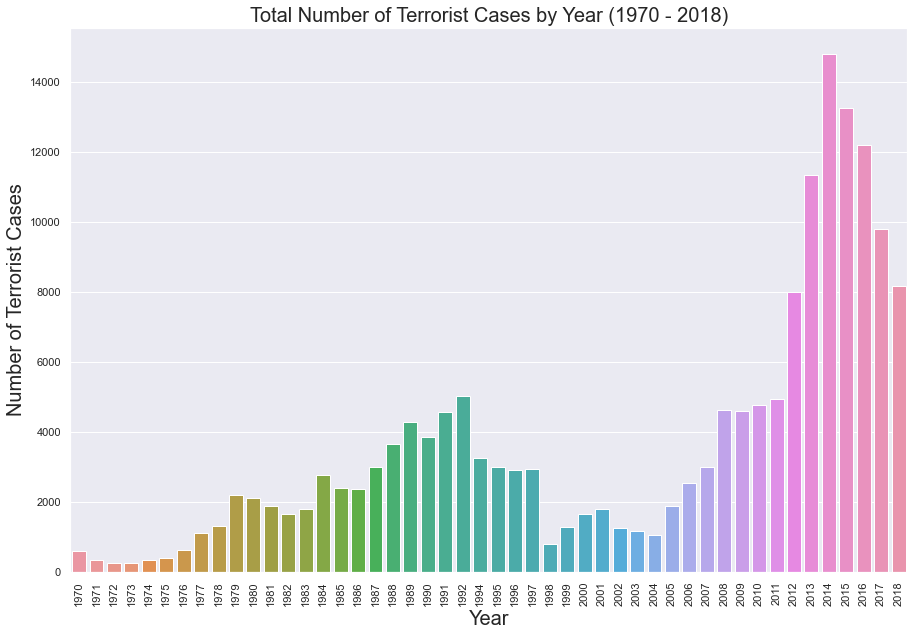

In [19]:
# Total number of terrorist cases by year
sns.set()
plt.subplots(figsize = (15, 10))
sns.countplot(data['year'])
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.xticks(rotation = 90)
plt.title('Total Number of Terrorist Cases by Year (1970 - 2018)', fontsize = 20)

The terrorist activities has seen a gradual increasing trend from 1970 to 1992. 
After 1992, it started decreasing until around 2000.
From 2000, there has been a shapr increase in the number of terrorist cases until 2014, and it started going down after that.

Text(0.5, 1.0, 'Total Number of Casualties by Year (1970 - 2018)')

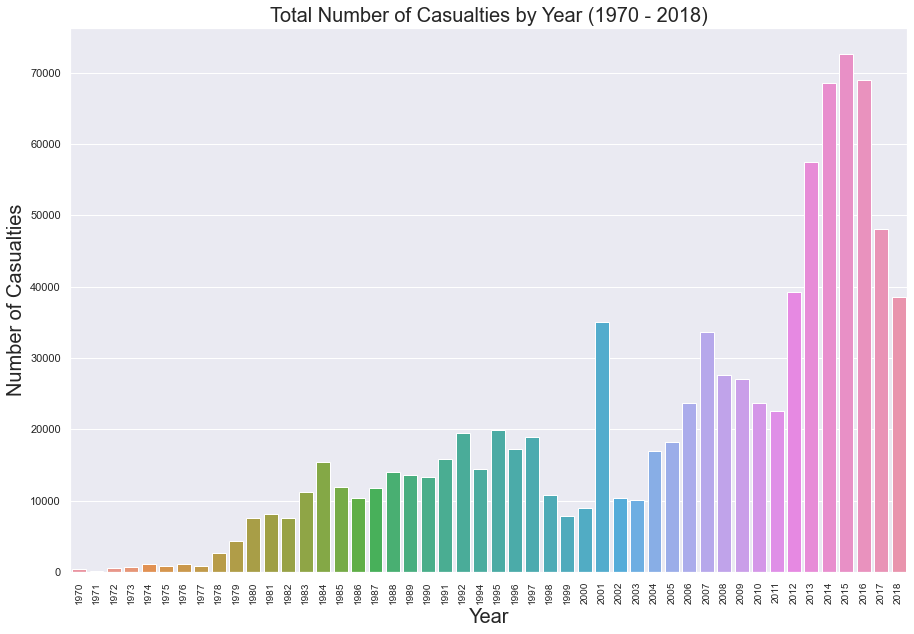

In [20]:
# Total number of casualties by year
data1 = data.groupby('year', as_index= False)['casualty'].sum()

plt.subplots(figsize = (15, 10))
sns.barplot(x = data1['year'], y = data1['casualty'], ci = None)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Casualties', fontsize = 20)
plt.xticks(rotation = 90)
plt.title('Total Number of Casualties by Year (1970 - 2018)', fontsize = 20)

### Numerical Variable (Label)

Text(0.5, 1.0, 'Histogram of the Number of Casualty')

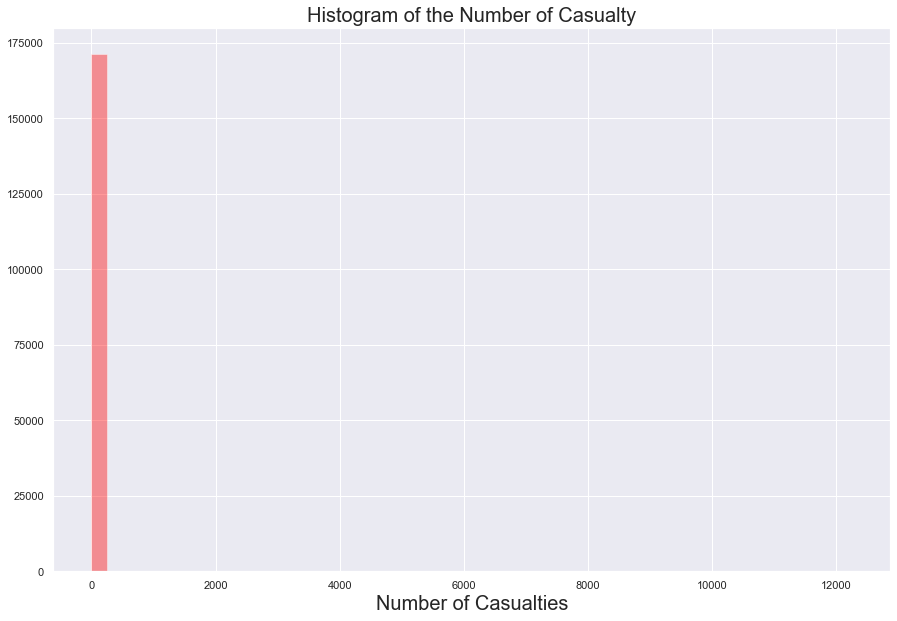

In [21]:
# Histogram of number of casualties
plt.subplots(figsize = (15, 10))
sns.distplot(data['casualty'], kde = False, color = 'red')
plt.xlabel('Number of Casualties', fontsize = 20)
plt.title('Histogram of the Number of Casualty', fontsize = 20)

In [22]:
data['casualty'].describe()

count    171626.000000
mean          5.321729
std          48.908349
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max       12263.000000
Name: casualty, dtype: float64

Even though the histogram looks weird, it's because the outliers in higher ranges, which is a very rare occurrence.

Text(0.5, 1.0, 'Histogram of the Number of Casualty in Log Scale')

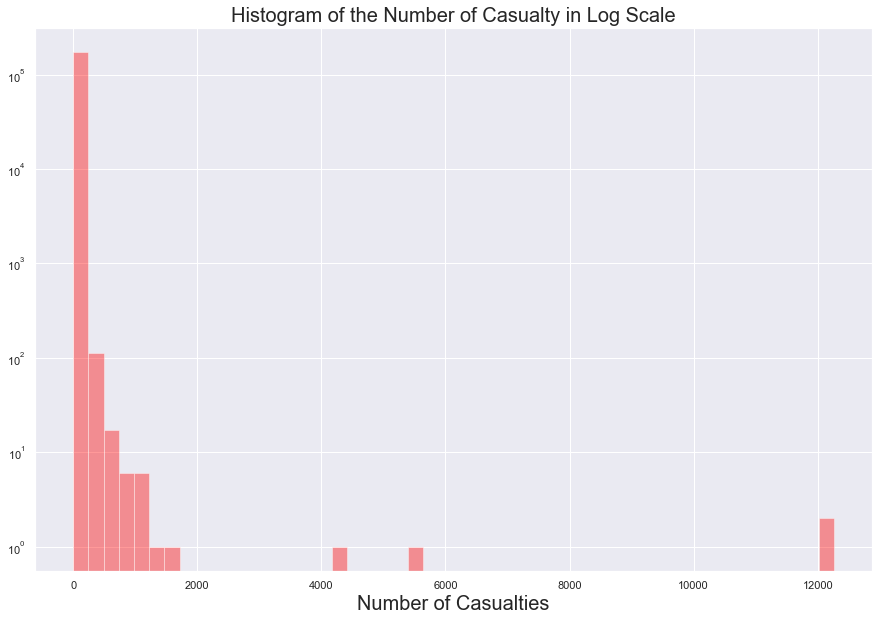

In [23]:
# Histogram of number of casualties (in log scale)
plt.subplots(figsize = (15, 10))
sns.distplot(data['casualty'], kde = False, color = 'red')
plt.yscale("log")
plt.xlabel('Number of Casualties', fontsize = 20)
plt.title('Histogram of the Number of Casualty in Log Scale', fontsize = 20)

### Categorical Attributes

Text(0.5, 0.98, 'Barplot of Categorical Attributes with Yes/No levels')

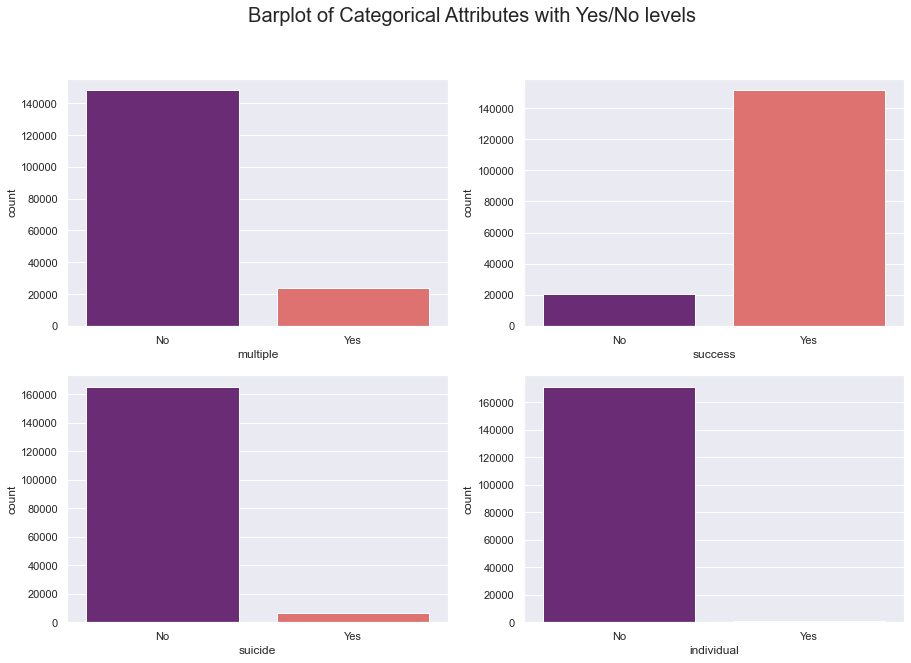

In [24]:
# Categorical variables with 2 levels (Yes/No)
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.countplot(data['multiple'], ax = ax[0, 0], palette = 'magma')
sns.countplot(data['success'], ax = ax[0, 1], palette = 'magma')
sns.countplot(data['suicide'], ax = ax[1, 0], palette = 'magma')
sns.countplot(data['individual'], ax = ax[1, 1], palette = 'magma')
plt.suptitle('Barplot of Categorical Attributes with Yes/No levels', fontsize = 20)

Text(0.5, 1.0, 'Number of Terrorist Cases By Top 20 Country')

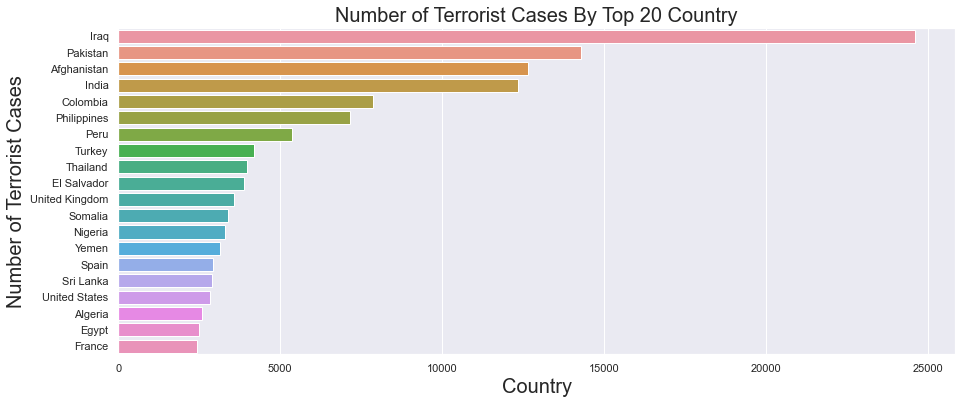

In [25]:
# Top 20 Country
plt.subplots(figsize=(15, 6))
sns.barplot(data['country'].value_counts()[:20].values,
            data['country'].value_counts()[:20].index)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.title('Number of Terrorist Cases By Top 20 Country', fontsize = 20)

We can see that after top 7th country, Peru, the number of terrorist cases shows a gradual decrease, which is different from the first top 7 countries.

In [26]:
# Rename the countries after top 7 as "Other"
top7_country = data['country'].value_counts().index[:7]
data['country'] = np.where(data['country'].isin(top7_country), data['country'], 'Other')

# Check
data["country"].value_counts()

Other          87387
Iraq           24594
Pakistan       14275
Afghanistan    12650
India          12324
Colombia        7871
Philippines     7149
Peru            5376
Name: country, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist Cases By Top 20 Victim Nationality')

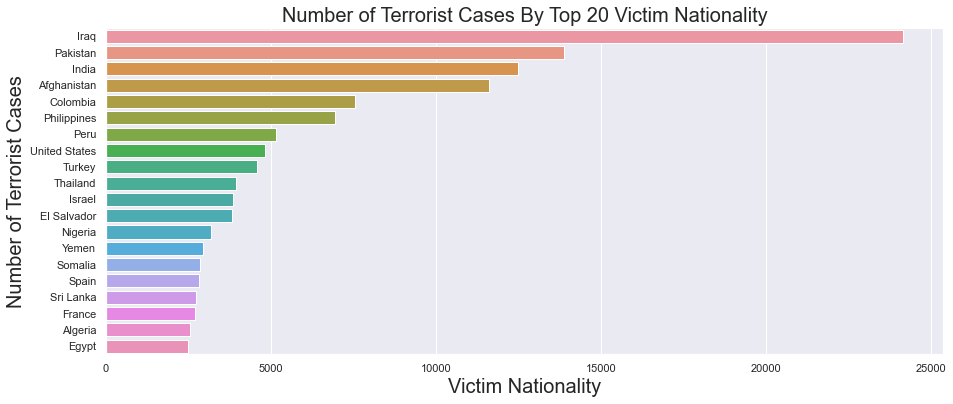

In [27]:
# Top 20 Target Type
plt.subplots(figsize=(15, 6))
sns.barplot(data['victNationality'].value_counts()[:20].values,
            data['victNationality'].value_counts()[:20].index)
plt.xlabel('Victim Nationality', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.title('Number of Terrorist Cases By Top 20 Victim Nationality', fontsize = 20)

This shows a very similar trend as in Country visualization. However, in this case, only the top 6 nationalities seem important.

In [28]:
# Rename the countries after top 6 as "Other"
top6_nationality = data['victNationality'].value_counts().index[:6]
data['victNationality'] = np.where(data['victNationality'].isin(top6_nationality), data['victNationality'], 'Other')

# Check
data["victNationality"].value_counts()

Other          94972
Iraq           24159
Pakistan       13885
India          12494
Afghanistan    11618
Colombia        7542
Philippines     6956
Name: victNationality, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist Cases By Region')

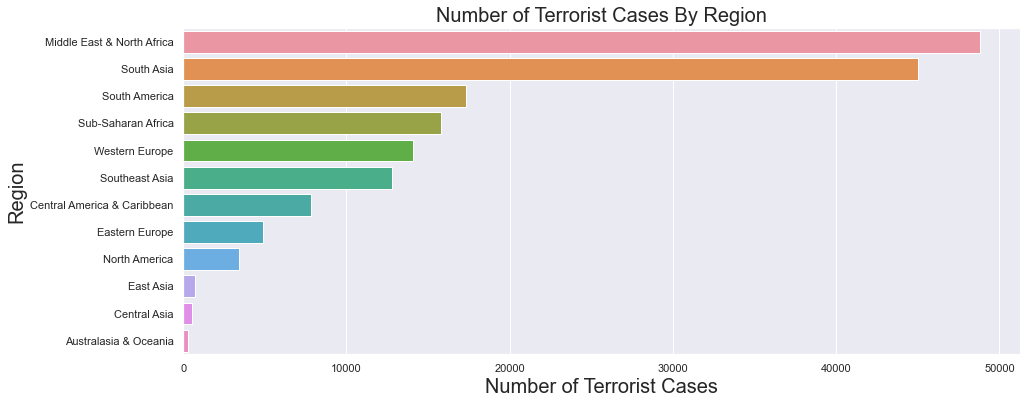

In [29]:
# Region
plt.subplots(figsize=(15, 6))
sns.countplot(y = data['region'], order = data['region'].value_counts().index)
plt.xlabel('Number of Terrorist Cases', fontsize = 20)
plt.ylabel('Region', fontsize = 20)
plt.title('Number of Terrorist Cases By Region', fontsize = 20)

Text(0.5, 1.0, 'Number of Terrorist Cases By Top 20 Perpetrator Group')

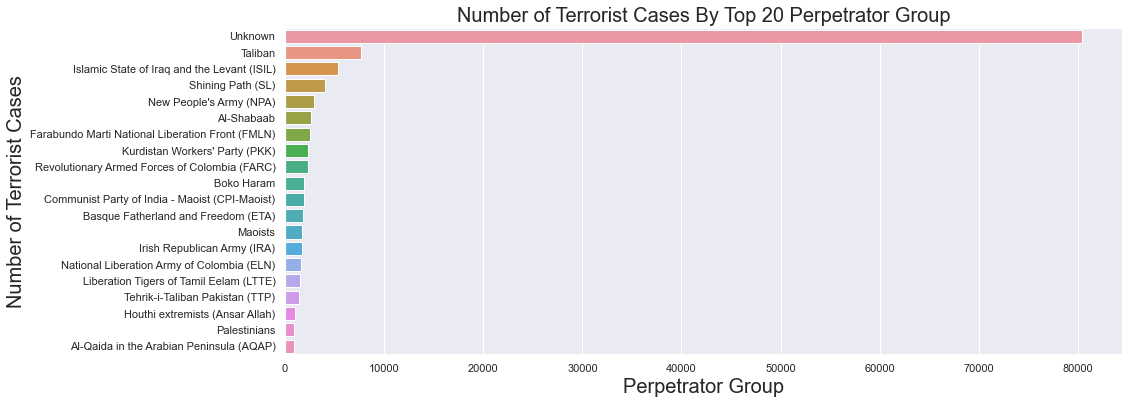

In [30]:
# Top 20 Perpetrator Group
plt.subplots(figsize=(15, 6))
sns.barplot(data['perpGroup'].value_counts()[:20].values,
            data['perpGroup'].value_counts()[:20].index)
plt.xlabel('Perpetrator Group', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.title('Number of Terrorist Cases By Top 20 Perpetrator Group', fontsize = 20)

It is hard to see the pattern because of the 'Unknown' group.

Text(0.5, 1.0, "Number of Terrorist Cases By Top 20 Perpetrator Group Except for the group 'Unknown'")

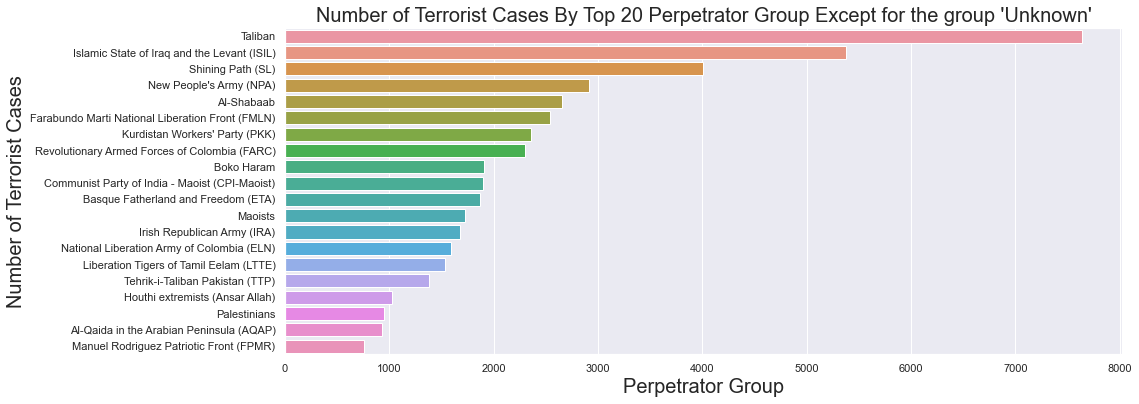

In [31]:
# Top 20 Perpetrator Group except for 'Unknown'
data3 = data.query('perpGroup != "Unknown"')

plt.subplots(figsize=(15, 6))
sns.barplot(data3['perpGroup'].value_counts()[:20].values,
            data3['perpGroup'].value_counts()[:20].index)
plt.xlabel('Perpetrator Group', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.title("Number of Terrorist Cases By Top 20 Perpetrator Group Except for the group 'Unknown'", fontsize = 20)

Since there were so many 'Unknown' group counts, it made seeing the clear trends of other groups difficult. So the 'Unknown' group is removed in this graph. Including the 'Unknown' group, top 4 groups are the major 4 groups. 

In [32]:
# Rename the perpetrator group after top 4 as "Other"
top4_perpGroup = data['perpGroup'].value_counts().index[:4]
data['perpGroup'] = np.where(data['perpGroup'].isin(top4_perpGroup), data['perpGroup'], 'Other')

# Check
data["perpGroup"].value_counts()

Unknown                                        80408
Other                                          74195
Taliban                                         7640
Islamic State of Iraq and the Levant (ISIL)     5375
Shining Path (SL)                               4008
Name: perpGroup, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist Cases By Attack Type')

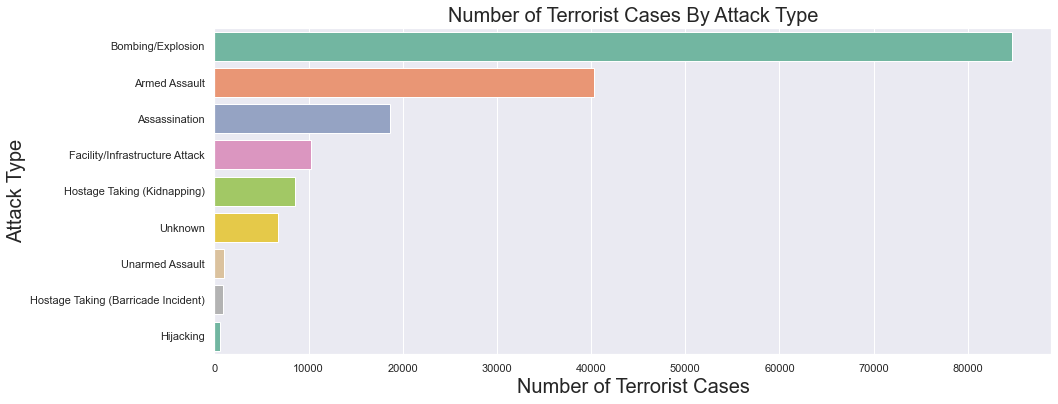

In [33]:
# Attack Type
plt.subplots(figsize=(15, 6))
sns.countplot(y = data['attackType'], order = data['attackType'].value_counts().index, palette = 'Set2')
plt.xlabel('Number of Terrorist Cases', fontsize = 20)
plt.ylabel('Attack Type', fontsize = 20)
plt.title('Number of Terrorist Cases By Attack Type', fontsize = 20)

Text(0.5, 1.0, 'Number of Terrorist Cases By Top 20 Target Type')

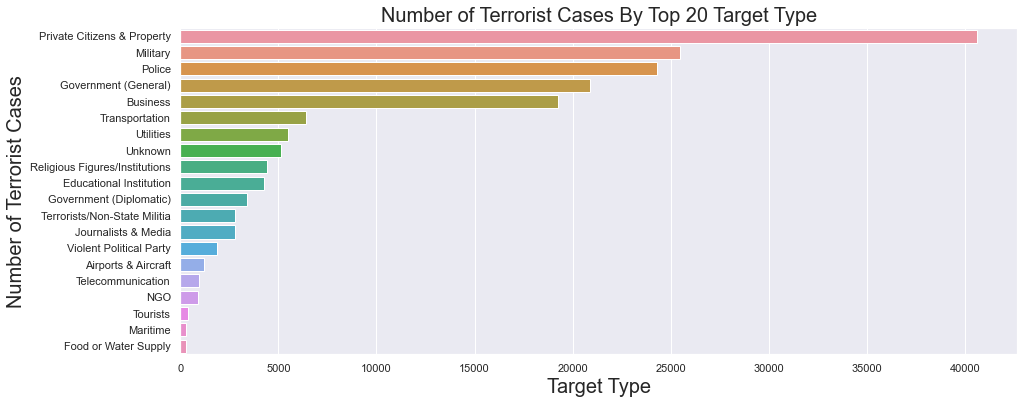

In [34]:
# Top 20 Target Type
plt.subplots(figsize=(15, 6))
sns.barplot(data['targetType'].value_counts()[:20].values,
            data['targetType'].value_counts()[:20].index)
plt.xlabel('Target Type', fontsize = 20)
plt.ylabel('Number of Terrorist Cases', fontsize = 20)
plt.title('Number of Terrorist Cases By Top 20 Target Type', fontsize = 20)

After top 5 target type, the number of terrorist cases sharply decrease.

In [35]:
# Rename the target types after top 5 as "Other"
top5_targetType = data['targetType'].value_counts().index[:5]
data['targetType'] = np.where(data['targetType'].isin(top5_targetType), data['targetType'], 'Other')

# Check
data["targetType"].value_counts()

Other                          41060
Private Citizens & Property    40637
Military                       25471
Police                         24321
Government (General)           20909
Business                       19228
Name: targetType, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist Cases By Weapon Type')

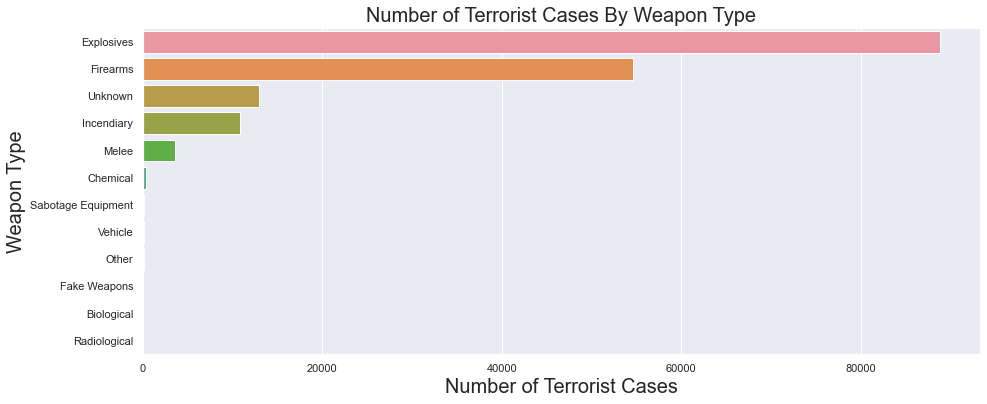

In [36]:
# Weapon Type
plt.subplots(figsize=(15, 6))
sns.countplot(y = data['weaponType'], order = data['weaponType'].value_counts().index)
plt.xlabel('Number of Terrorist Cases', fontsize = 20)
plt.ylabel('Weapon Type', fontsize = 20)
plt.title('Number of Terrorist Cases By Weapon Type', fontsize = 20)

### Terrorist Trends by Categories (Not included in the report. Just for my understanding)

Text(0.5, 1.0, 'Number of Terrorist Cases By Region')

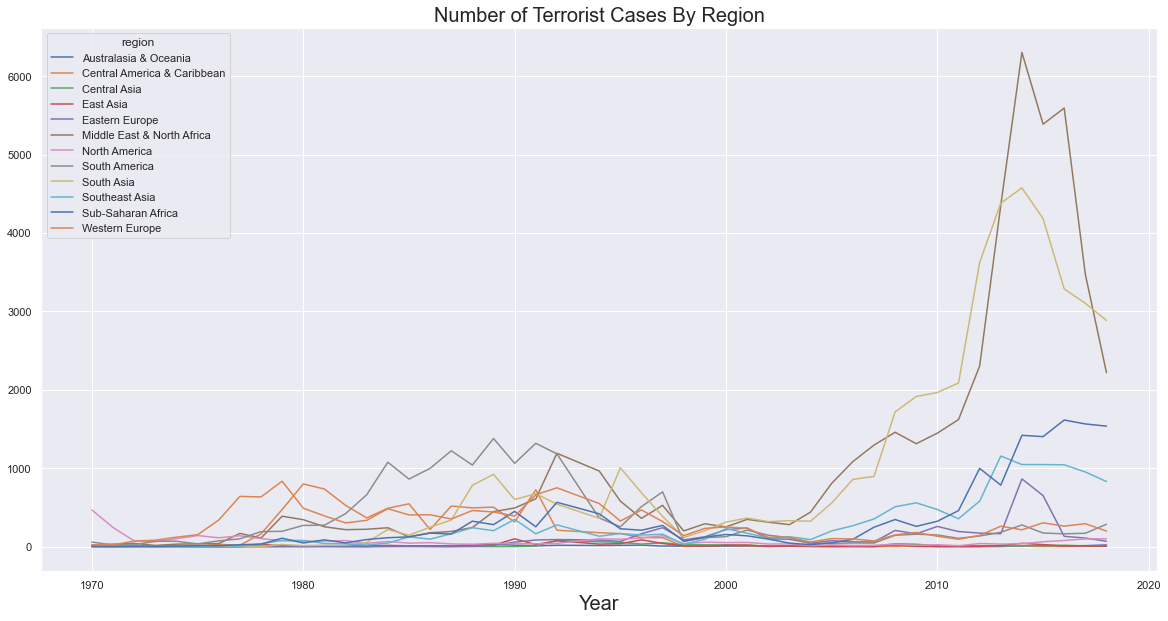

In [37]:
pd.crosstab(data['year'], data['region']).plot()
p = plt.gcf()
p.set_size_inches(20, 10)
plt.xlabel('Year', fontsize = 20)
plt.title('Number of Terrorist Cases By Region', fontsize = 20)

Text(0.5, 1.0, 'Number of Terrorist Cases By Region')

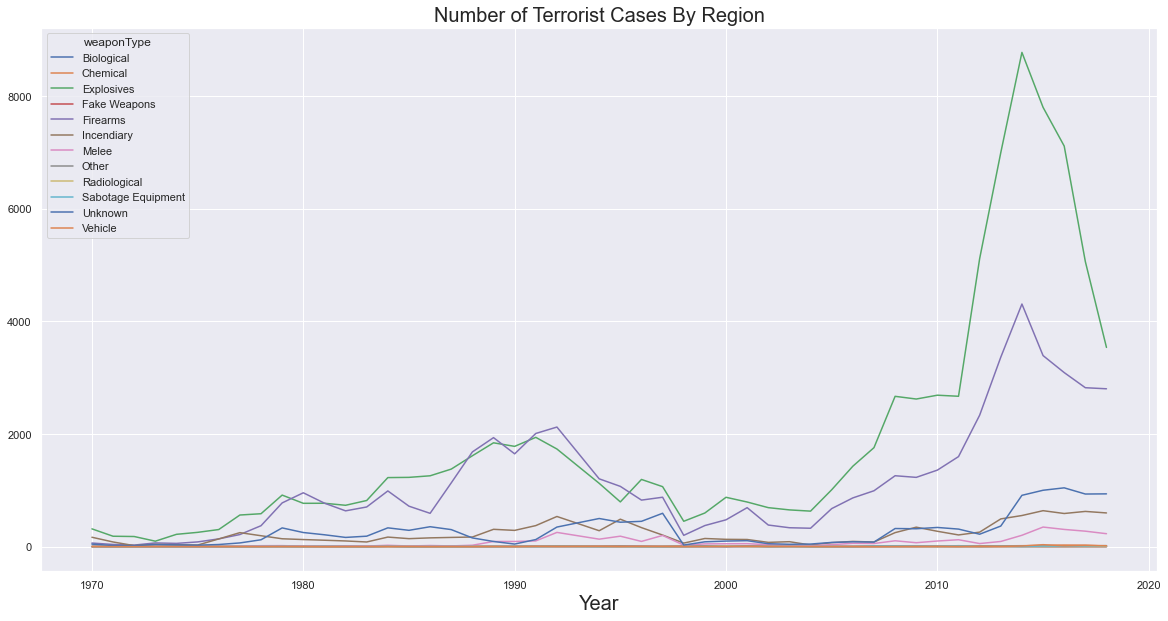

In [38]:
pd.crosstab(data['year'], data['weaponType']).plot()
p = plt.gcf()
p.set_size_inches(20, 10)
plt.xlabel('Year', fontsize = 20)
plt.title('Number of Terrorist Cases By Region', fontsize = 20)

### Correlation

In [39]:
# Dummy encoding
data_encoded = pd.get_dummies(data)

In [40]:
# Check the absolute correlations to Risk_good
abs_corr = abs(data_encoded.corr()['casualty'])
abs_corr.sort_values(ascending = False)

casualty                         1.000000
suicide_No                       0.107083
suicide_Yes                      0.107083
weaponType_Vehicle               0.100513
attackType_Hijacking             0.045656
                                   ...   
weaponType_Sabotage Equipment    0.001828
weaponType_Other                 0.001762
weaponType_Fake Weapons          0.001477
weaponType_Radiological          0.000947
region_Central Asia              0.000091
Name: casualty, Length: 69, dtype: float64

In [41]:
# Select the attributes with a absolute correlation greater than equal to 0.1
attribs_encoded = data_encoded.columns[abs_corr >= 0.1]
attribs_encoded = attribs_encoded[(attribs_encoded != "casualty")]
attribs_encoded

Index(['suicide_No', 'suicide_Yes', 'weaponType_Vehicle'], dtype='object')

In [42]:
# Convert attribs_encoded to the original attributes before one-hot encoding.
# Note that the following code assumes that the encoded attribute name is obtained from the original attribute name
# by appending "_" and that the original attribute names do not include "_"

attribs = []

for a in attribs_encoded:
    index = a.find('_')
    if index > 0:
        a = a[:index]
    if a not in attribs:
        attribs.append(a)
        
print(attribs)

['suicide', 'weaponType']


## Prepare the Data for Machine Learning Algorithms

In [43]:
num_attribs = [a for a in attribs if data[a].dtypes == 'int64']
cat_attribs = [a for a in attribs if data[a].dtypes != 'int64']

print(num_attribs)
print(cat_attribs)

[]
['suicide', 'weaponType']


**Handle Missing Features**

Missing values were already handled in data cleaning process.

**Handle Numerical Attributes**

There is no numerical attribute included in the model.

**Handle Categorical Attributes**

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_attribs)
])

In [45]:
x = preprocessor.fit_transform(data[attribs])
y = (data["casualty"])

In [46]:
# Split the data into training and test sets such that 20% of the dataset will be used as the test set. 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Explore Different Models and Shortlist the Best Ones

**Explore Different Models**

In [47]:
# Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_train_poly = poly_features.fit_transform(x_train)
poly_reg = LinearRegression().fit(x_train_poly, y_train)

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'auto').fit(x_train, y_train)

# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1).fit(x_train, y_train)

# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5).fit(x_train, y_train)

# SVM Regression 
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1).fit(x_train, y_train)

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 2)

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

poly_reg_pred = cross_val_predict(poly_reg, x_train, y_train, cv = 3)
ridge_reg_pred = cross_val_predict(ridge_reg, x_train, y_train, cv = 3)
lasso_reg_pred = cross_val_predict(lasso_reg, x_train, y_train, cv = 3)
elastic_net_reg_pred = cross_val_predict(elastic_net, x_train, y_train, cv = 3)
svm_poly_reg_pred = cross_val_predict(svm_poly_reg, x_train, y_train, cv = 3)
tree_reg_pred = cross_val_predict(tree_reg, x_train, y_train, cv = 3)

# Polynomial Regression
print("Polynomial Regression")
print(" - RMSE:", sqrt(mean_squared_error(y_train, poly_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, poly_reg_pred))
print(" - R-Squared:", r2_score(y_train, poly_reg_pred))
print(" - Standard Deviation:", np.std(poly_reg_pred))

# Ridge Regression 
print("Ridge Regression")
print(" - RMSE:", sqrt(mean_squared_error(y_train, ridge_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, ridge_reg_pred))
print(" - R-Squared:", r2_score(y_train, ridge_reg_pred))
print(" - MAE: ", mean_absolute_error(y_train, ridge_reg_pred))
print(" - R-Squared:", r2_score(y_train, ridge_reg_pred))
print(" - Standard Deviation:", np.std(ridge_reg_pred))

# Lasso Regression 
print("Lasso Regression")
print(" - RMSE:", sqrt(mean_squared_error(y_train, lasso_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, lasso_reg_pred))
print(" - R-Squared:", r2_score(y_train, lasso_reg_pred))
print(" - MAE: ", mean_absolute_error(y_train, lasso_reg_pred))
print(" - R-Squared:", r2_score(y_train, lasso_reg_pred))
print(" - Standard Deviation:", np.std(lasso_reg_pred))

# Elastic Net 
print("Elastic Net")
print(" - RMSE:", sqrt(mean_squared_error(y_train, elastic_net_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, elastic_net_reg_pred))
print(" - R-Squared:", r2_score(y_train, elastic_net_reg_pred))
print(" - Standard Deviation:", np.std(elastic_net_reg_pred))

# SVM Regression
print("SVM Regression")
print(" - RMSE:", sqrt(mean_squared_error(y_train, svm_poly_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, svm_poly_reg_pred))
print(" - R-Squared:", r2_score(y_train, svm_poly_reg_pred))
print(" - Standard Deviation:", np.std(svm_poly_reg_pred))

# Decision Tree Regressor 
print("Decision Tree Regressor")
print(" - RMSE:", sqrt(mean_squared_error(y_train, tree_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, tree_reg_pred))
print(" - R-Squared:", r2_score(y_train, tree_reg_pred))
print(" - Standard Deviation:", np.std(tree_reg_pred))

Polynomial Regression
 - RMSE: 53.402648883168744
 - MAE:  6.348834101374554
 - R-Squared: 0.018099315667368776
 - Standard Deviation: 8.477879596552029
Ridge Regression
 - RMSE: 53.40127581545664
 - MAE:  6.348758427823375
 - R-Squared: 0.01814980749958861
 - MAE:  6.348758427823375
 - R-Squared: 0.01814980749958861
 - Standard Deviation: 8.428690969079769
Lasso Regression
 - RMSE: 53.56469603165362
 - MAE:  6.338545877244063
 - R-Squared: 0.012131236532663237
 - MAE:  6.338545877244063
 - R-Squared: 0.012131236532663237
 - Standard Deviation: 5.854781577085203
Elastic Net
 - RMSE: 53.66043881719427
 - MAE:  6.368624895138927
 - R-Squared: 0.008596601125680836
 - Standard Deviation: 3.1146265738792867
SVM Regression
 - RMSE: 53.865307180093026
 - MAE:  4.937411480585428
 - R-Squared: 0.0010120597465428371
 - Standard Deviation: 2.328106575837695
Decision Tree Regressor
 - RMSE: 53.71236104042818
 - MAE:  6.3619321292574815
 - R-Squared: 0.006677094914581572
 - Standard Deviation: 36.5

**Shortlist the Best Ones**

Either Polynomial Regression or Ridge Regression.

## Fine-tune the Model

**Hyperparameter Tuning**

In [49]:
# Polynomial regression
# No hyperparameter to tune

# Ridge Regression
ridge_reg2 = Ridge(alpha = 50, solver = 'auto').fit(x_train, y_train)
ridge_reg_pred2 = cross_val_predict(ridge_reg2, x_train, y_train, cv = 3)
print("Ridge Regression with Alpha 50")
print(" - RMSE:", sqrt(mean_squared_error(y_train, ridge_reg_pred2)))
print(" - MAE: ", mean_absolute_error(y_train, ridge_reg_pred2))
print(" - R-Squared:", r2_score(y_train, ridge_reg_pred2))
print(" - Standard Deviation:", np.std(ridge_reg_pred2))

ridge_reg3 = Ridge(alpha = 100, solver = 'auto').fit(x_train, y_train)
ridge_reg_pred3 = cross_val_predict(ridge_reg3, x_train, y_train, cv = 3)
print("Ridge Regression with Alpha 100")
print(" - RMSE:", sqrt(mean_squared_error(y_train, ridge_reg_pred3)))
print(" - MAE: ", mean_absolute_error(y_train, ridge_reg_pred3))
print(" - R-Squared:", r2_score(y_train, ridge_reg_pred3))
print(" - Standard Deviation:", np.std(ridge_reg_pred3))

Ridge Regression with Alpha 50
 - RMSE: 53.394610068808674
 - MAE:  6.334333398348821
 - R-Squared: 0.018394908615940175
 - Standard Deviation: 7.037916912662763
Ridge Regression with Alpha 100
 - RMSE: 53.41737471517935
 - MAE:  6.3266539775418025
 - R-Squared: 0.017557720880795213
 - Standard Deviation: 6.432844118256723


**Ensemble**

In [50]:
# Polynomial Regression
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
adaboost_poly_reg = AdaBoostRegressor(LinearRegression(), n_estimators = 100, random_state = 30).fit(x_train_poly, y_train)

adaboost_poly_reg_pred = cross_val_predict(adaboost_poly_reg, x_train, y_train, cv = 3)

print("Polynomial Regression with AdaBoost")
print(" - RMSE:", sqrt(mean_squared_error(y_train, adaboost_poly_reg_pred)))
print(" - MAE: ", mean_absolute_error(y_train, adaboost_poly_reg_pred))
print(" - R-Squared:", r2_score(y_train, adaboost_poly_reg_pred))
print(" - Standard Deviation:", np.std(adaboost_poly_reg_pred))

# Ridge Regression
# AdaBoost Regressor
adaboost_ridge_reg = AdaBoostRegressor(Ridge(alpha = 1, solver = 'auto'), n_estimators = 100, random_state = 30).fit(x_train, y_train)

adaboost_poly_ridge_pred = cross_val_predict(adaboost_ridge_reg, x_train, y_train, cv = 3)

print("Polynomial Regression with AdaBoost")
print(" - RMSE:", sqrt(mean_squared_error(y_train, adaboost_poly_ridge_pred)))
print(" - MAE: ", mean_absolute_error(y_train, adaboost_poly_ridge_pred))
print(" - R-Squared:", r2_score(y_train, adaboost_poly_ridge_pred))
print(" - Standard Deviation:", np.std(adaboost_poly_ridge_pred))

Polynomial Regression with AdaBoost
 - RMSE: 85.02940997932066
 - MAE:  25.14472875830578
 - R-Squared: -1.4893175145552222
 - Standard Deviation: 81.60439235896938
Polynomial Regression with AdaBoost
 - RMSE: 100.58379345392943
 - MAE:  32.35158075012409
 - R-Squared: -2.48335699032906
 - Standard Deviation: 99.07252503733412


**Evaluate the Final System on the Test Set**

In [51]:
y_pred = ridge_reg2.predict(x_test)
print("Ridge Regression")
print(" - RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print(" - MAE: ", mean_absolute_error(y_test, y_pred))
print(" - R-Squared:", r2_score(y_test, y_pred))
print(" - Standard Deviation:", np.std(y_pred))

Ridge Regression
 - RMSE: 18.463378193990398
 - MAE:  6.158070162038619
 - R-Squared: 0.004577209149039252
 - Standard Deviation: 7.27226379393234
